In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('ecg.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [4]:
features = df.drop(140, axis=1)
target= df[140]

In [5]:
df.shape

(4998, 141)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [7]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
class autoencoder(Model):
    def __init__(self, output):
        super().__init__()
        self.encoder = Sequential([
            Dense(512, activation="relu"),
            Dropout(0.01),
            Dense(128, activation="relu"),
            Dropout(0.01),
            Dense(64, activation="relu"),
        ])
        
        self.decoder = Sequential([
            Dense(64, activation="relu"),
            Dropout(0.01),
            Dense(128, activation="relu"),
            Dropout(0.01),
            Dense(64, activation="relu"),
            Dropout(0.01),
            Dense(output, activation='sigmoid')
        ])
        
    def call(self, input):
        code = self.encoder(input)
        return self.decoder(code)

In [9]:
model = autoencoder(x_train.shape[1])
model.compile(loss='msle', optimizer='adam', metrics=['mse'])

In [12]:
e=11
h = model.fit(x_train, x_train, validation_data=(x_test, x_test), epochs=e, batch_size=128)

Epoch 1/11
32/32 [==============================] - 2s 12ms/step - loss: 0.0079 - mse: 0.0192 - val_loss: 0.0045 - val_mse: 0.0108
Epoch 2/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0035 - mse: 0.0083 - val_loss: 0.0026 - val_mse: 0.0061
Epoch 3/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0053 - val_loss: 0.0021 - val_mse: 0.0050
Epoch 4/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0019 - mse: 0.0046 - val_loss: 0.0017 - val_mse: 0.0042
Epoch 5/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0016 - mse: 0.0038 - val_loss: 0.0014 - val_mse: 0.0034
Epoch 6/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0013 - mse: 0.0031 - val_loss: 0.0012 - val_mse: 0.0028
Epoch 7/11
32/32 [==============================] - 0s 8ms/step - loss: 0.0012 - mse: 0.0027 - val_loss: 0.0010 - val_mse: 0.0025
Epoch 8/11
32/32 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0

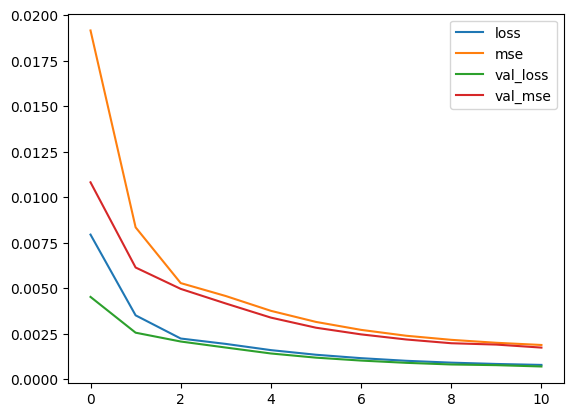

In [14]:
plt.plot(np.arange(0,e), h.history['loss'], label='loss')
plt.plot(np.arange(0,e), h.history['mse'], label='mse')
plt.plot(np.arange(0,e), h.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,e), h.history['val_mse'], label='val_mse')
plt.legend()